In [4]:
import numpy as np
# 넘파이를 사용해서 배열 연산수행

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

#배열 크기
print(arr.shape)

#배열 합
print(np.sum(arr))

#배열 평균
print(np.mean(arr))

#배열의 최대값, 최소값 출력
print(np.min(arr), np.max(arr))

(8,)
36
4.5
1 8


In [10]:
import pandas as pd

data = {'이름' : ['짱구', '철수', '유리', '훈이', '치타', '맹구'],
        '나이' : [10, 14, 15, 11, 18, 19],
        '성적': [90, 85, 93, 100, 20, 35]}

df = pd.DataFrame(data)
df
#성적 평균 계산
avg = df['성적'].mean()
print(avg)

#나이가 15살 이상인 학생들 출력
stu = df[df['나이'] >= 15]
print(stu)

df

70.5
   이름  나이  성적
2  유리  15  93
4  치타  18  20
5  맹구  19  35


,이름,나이,성적
0,짱구,10,90
1,철수,14,85
2,유리,15,93
3,훈이,11,100
4,치타,18,20
5,맹구,19,35


# 1. 붓꽃 품종 예측

In [18]:
import pandas as pd
import numpy as np

#sklearn(사이킷런) 데이터셋에서 iris 데이터셋 로딩 
from sklearn import datasets

iris = datasets.load_iris() #iris 데이터 셋 로딩
iris #출력시 딕셔너리 형태로 되어있음을 확인

iris.keys() #딕셔너리 메소드 이용해서 key값들만 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [34]:
#데이터 셋 정보 출력
# print(iris['DESCR'])

#특징 이름 출력
# print(iris.feature_names)

#꽃의 품종에 해당하는 레이블 출력
# print(iris.target_names)

print(iris['target'])
# print(iris['frame'])
print(iris['target_names'])
# print(iris['feature_names'])
# print(iris['filename'])
# print(iris['data_module'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [31]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'patal_width']
df.head()

,sepal_length,sepal_width,petal_length,patal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
df['target'] = iris['target']
df

,sepal_length,sepal_width,petal_length,patal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
# 중복 데이터가 있는지 확인
df.duplicated().sum()

1

In [38]:
df.loc[df.duplicated(), :]

,sepal_length,sepal_width,petal_length,patal_width,target
142,5.8,2.7,5.1,1.9,2


In [39]:
df.loc[(df.sepal_length == 5.8) & (df.petal_length == 5.1), :]

,sepal_length,sepal_width,petal_length,patal_width,target
101,5.8,2.7,5.1,1.9,2
114,5.8,2.8,5.1,2.4,2
142,5.8,2.7,5.1,1.9,2


In [40]:
#중복값 제거
df = df.drop_duplicates()
df

,sepal_length,sepal_width,petal_length,patal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


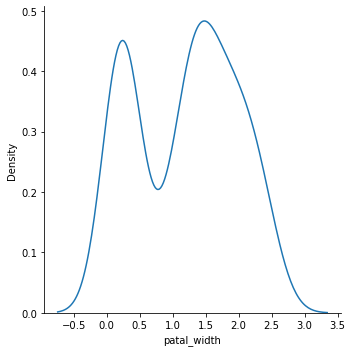

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(x = 'patal_width', kind = 'kde', data = df)


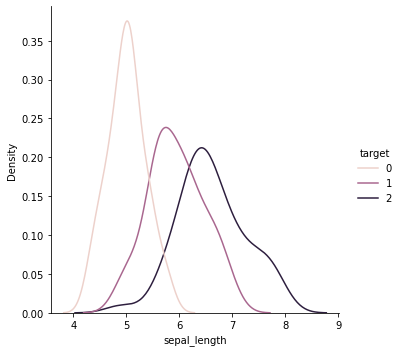

In [43]:
sns.displot(x = 'sepal_length', hue = 'target', kind = 'kde', data = df)

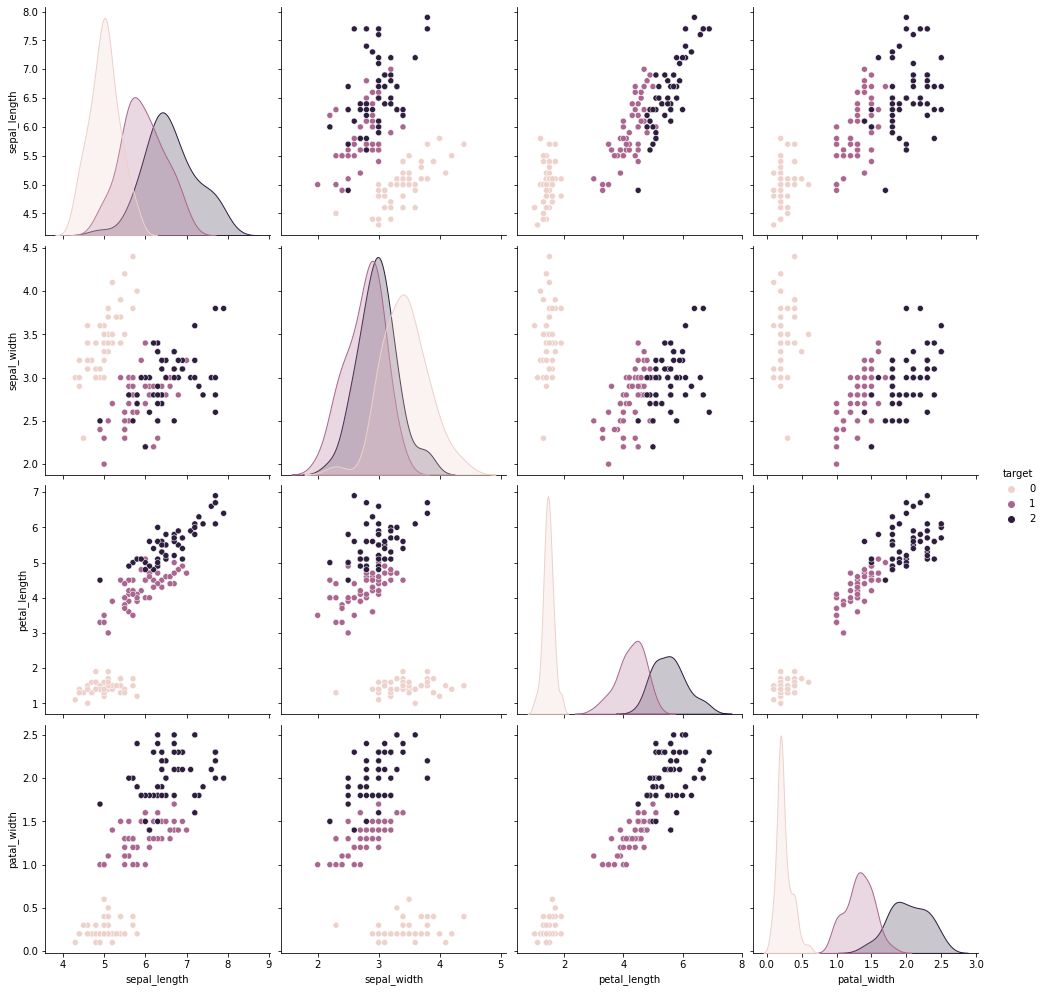

In [44]:
sns.pairplot(df, hue = 'target', height = 3.5, diag_kind = 'kde')
#.pairplot : 데이터 프레임의 열들간의 쌍(pair) 관계를 시각화
#df : 데이터프레임을 지정
#hue : target열의 값에 따라 구분함, 품종별 다른 색상으로 나타남
#height : 생성되는 그래프의 높이
#diag_kind : 대각선에 위치하는 그래프의 종류를 지정(밀도함수 그래프로 지정)

# Train 과 Test 데이터 셋 분할

In [46]:
from sklearn.model_selection import train_test_split

iris_data = iris.data
iris_data
iris_label = iris.target
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, test_size = 0.2, random_state = 7)

In [58]:
y_train
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

## knn 분류 알고리즘(K-최근접 이웃)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(algorithm ='auto', leaf_size = 30, metric = "minkowski",
                          metric_params = None, n_jobs = None, 
                          n_neighbors = 7, p = 2)
knn

KNeighborsClassifier(n_neighbors=7)

algorithm = 'auto' : knn알고리즘 구현 방법 설정
leaf_size : 리프노드의 크기를 제어하는 매개변수
metric = "minkowski" : 거리측정 방법 선택(맨하탄거리, 유클리드 거리포함)
metric_params = None : 거리측정 방법에 사용되는 매개변수를 설정, 사용하지 않을경우 None
n_jobs = None : 병렬처리를 사용할 때 사용하는 매개변수
n_neighbors = 7 : 이웃의 개수를 설정, KNN에서 예측 수행시 고려할 이웃의 개수 지정
p = 2 : 거리 측정 방식을 설정하는 매개변수 p = 2 유클리드 거리를 사용

In [62]:
knn.fit(X_train, y_train)
#생성한 knn분류 모델을 훈련 데이터로 학습

KNeighborsClassifier(n_neighbors=7)

In [63]:
y_knn = knn.predict(X_test)
print(f"예측값 : {y_knn}")

예측값 : [2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 2 2 1 1 1 2 2]


In [64]:
knn_acc = accuracy_score(y_test, y_knn)
print(f"정확도 : {knn_acc:.4f}")

정확도 : 0.8667


# SVM 분류 알고리즘

In [66]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, test_size = 0.2, random_state = 7)

In [67]:
from sklearn.svm import SVC
svc = SVC(C = 1.0, kernel = 'rbf', random_state = None)
svc

SVC()

In [70]:
svc.fit(X_train, y_train)

y_svc = svc.predict(X_test)
print(f"예측값 : {y_svc}")

svc_acc = accuracy_score(y_test, y_svc)
print(f"정확도 : {svc_acc}")

예측값 : [2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2]
정확도 : 0.8666666666666667


# 로지스틱 회귀

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1.0)

lr.fit(X_train, y_train)

y_lr = lr.predict(X_test)
print(f"예측값 : {y_lr}")

lr_acc = accuracy_score(y_test, y_lr)
print(f"정확도 : {lr_acc:.4f}")

예측값 : [2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2]
정확도 : 0.8667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree(의사 결정 나무)

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

decison_tree = DecisionTreeClassifier(random_state = 32)
decison_tree

decison_tree.fit(X_train, y_train)

y_pred = decison_tree.predict(X_test)

print(f"예측값 : {y_pred}")

print(classification_report(y_test, y_pred))

예측값 : [2 1 0 1 2 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



- precision(정밀도) : positive 클래스로 예측한 샘플 중 실제로 positive인 샘플의 비율을 나타냄
- recall(재현율) : 실제로 positive인 샘플 중에서 모델이 positive로 정확하게 예측한 비율
- f1-score (f1-점수) : 정밀도와 재현율의 조화 평균을 나타내는 값
- support(지원) : 각 클래스별 실제 샘플 수

- accuracy(정확도) : 전체 예측 중 올바르게 예측한 비율
- macro avg(매크로 평균) : 클래스 별 지표의 평균을 계산함
- weighted avg(가중평균) : 클래스 별 지표의 가중 평균

# 데이터 전처리 추가진행

In [86]:
#데이터 셋 import
from sklearn.datasets import load_iris

#데이터 로드
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [88]:
train_data = iris.data
train_label = iris.target
print(train_data.shape)
print(train_label.shape)

(150, 4)
(150,)


In [89]:
train_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [90]:
train_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [94]:
iris_df = pd.DataFrame(data= train_data, columns = iris.feature_names)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [95]:
iris_df.describe() #통계정보 요약

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [97]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64